In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [9]:
df = pd.read_csv("publication_strategies.csv")

# Descriptive Analysis

In [10]:
df.head()

,clave,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,cites_3y,q3q4
0,1-2007,10,0,22,1,0,0,0,4,4,2,0
1,1-2008,11,2,23,2,0,0,0,5,2,2,3
2,1-2009,6,1,14,1,0,0,0,2,1,2,1
3,1-2010,32,18,59,6,0,0,0,8,6,6,2
4,1-2011,3,0,5,0,0,0,0,1,1,0,0


In [11]:
df.describe()

,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,cites_3y,q3q4
count,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000
mean,4.271525,0.843357,9.497904,0.720372,0.024508,0.155676,0.565826,1.165390,0.909183,1.356538,0.301516
std,9.322728,6.601937,38.507583,1.439740,0.190590,0.794801,1.447716,1.800131,1.522177,3.221530,0.766290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,12.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,708.000000,665.000000,3909.000000,49.000000,5.000000,33.000000,29.000000,24.000000,24.000000,93.000000,15.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24808 entries, 0 to 24807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   clave         24808 non-null  object
 1   affiliations  24808 non-null  int64 
 2   intl_afil     24808 non-null  int64 
 3   authors       24808 non-null  int64 
 4   docs          24808 non-null  int64 
 5   book          24808 non-null  int64 
 6   chapter       24808 non-null  int64 
 7   conference    24808 non-null  int64 
 8   journal       24808 non-null  int64 
 9   q1q2          24808 non-null  int64 
 10  cites_3y      24808 non-null  int64 
 11  q3q4          24808 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 2.3+ MB


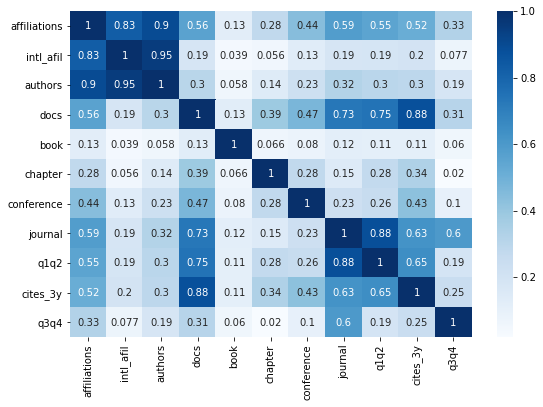

In [29]:
f, ax = plt.subplots(figsize=(9, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=plt.cm.Blues)
plt.show()

In [31]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

In [ ]:
X = df.iloc[:,1:11].values
y = df.iloc[:,0].values

# Principal Component Analysis (PCA)

## Standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Select number of components for PCA

### Short way

In [99]:
from sklearn.decomposition import PCA
variance_needed = 0.95
pca = PCA(n_components = variance_needed) # we indicate that we want to keep at leat 95% of variance explained
X_pca = pca.fit_transform(X_std)
print(f"Number of components needed to have at least {95}% of explained variance = {pca.n_components_}")

Number of components needed to have at least 95% of explained variance = 6


### Long way

In [100]:
pca = PCA()
X_pca = pca.fit(X_std)

In [101]:
eigen_vectors= pca.components_
eigen_values = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
numbers_of_components = range(1, len(explained_variance_ratio) + 1)
print(pd.DataFrame( {'cumulativa explained variance': np.cumsum(explained_variance_ratio)}, index=numbers_of_components))

    cumulativa explained variance
1                        0.465502
2                        0.655503
3                        0.760146
4                        0.857553
5                        0.930003
6                        0.972515
7                        0.984439
8                        0.994316
9                        0.997630
10                       1.000000


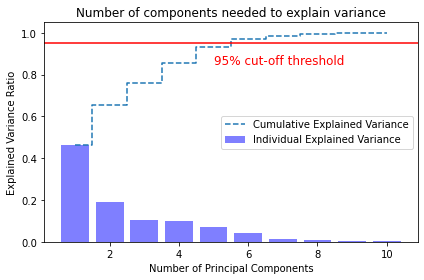

In [102]:
plt.figure(figsize=(6, 4))
plt.bar(numbers_of_components, explained_variance_ratio, alpha=0.5, align='center',
        label='Individual Explained Variance', color='blue')
plt.step(numbers_of_components, np.cumsum(explained_variance_ratio), where='mid', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.title("Number of components needed to explain variance")
plt.legend(loc='best')
plt.tight_layout()

### Results
We decided to use the first six Principal Components since they are able to explain more than 95% of the variance, while reducing the number of numerical variables from 11 to 6 - almost half.

# Clustering

# K means

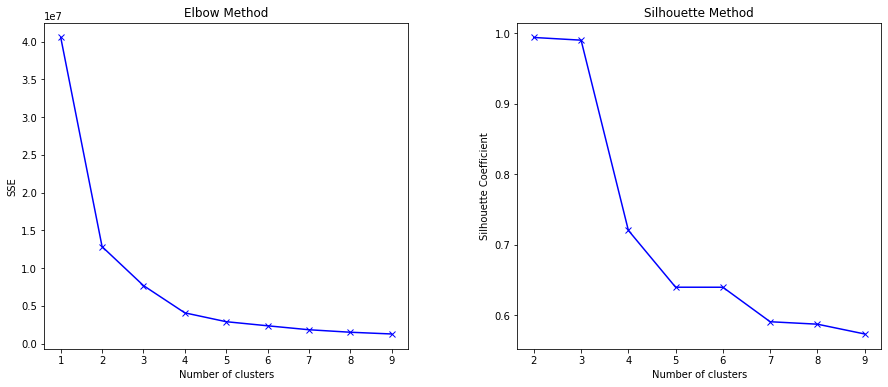

In [23]:
sse = []
silhouette_coeff = []
K = range(1,10) 

for k in K:  
    k_means = KMeans(n_clusters=k)
    cluster_labels = k_means.fit_predict(X)     
    
    sse.append(k_means.inertia_)
    if k > 1:
        silhouette_coeff.append(silhouette_score(X, cluster_labels))
    
fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0].plot(K, sse, 'bx-') 
ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('SSE') 
ax[0].set_title('Elbow Method') 

ax[1].plot(K[1:], silhouette_coeff, 'bx-')
ax[1].set_xlabel('Number of clusters') 
ax[1].set_ylabel('Silhouette Coefficient') 
ax[1].set_title('Silhouette Method')
plt.subplots_adjust(wspace=0.3)
plt.show() 

In [24]:
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(X) 

In [25]:
ari = adjusted_rand_score(y, y_pred)
mi = mutual_info_score(y, y_pred)
nmi = adjusted_mutual_info_score(y, y_pred)
ami = normalized_mutual_info_score(y, y_pred)
print("Adjusted Rand Index: ", ari)
print("Mutual Information: ", mi)
print("Normalized Mutual Information (NMI): ", nmi)
print("Adjusted Mutual Information (AMI): ", ami)

Adjusted Rand Index:  0.0
Mutual Information:  0.002409760211551668
Normalized Mutual Information (NMI):  -2.3473997487740776e-14
Adjusted Mutual Information (AMI):  0.00047617455825450686


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='brg',
edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=y_pred, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['1-2007' '1-2008' '1-2009' ... '3349-2012' '3349-2013' '3349-2014']

# DBSCAN Model

In [ ]:
dbscan = DBSCAN(0.42)
y_pred2 = dbscan.fit_predict(X)

In [ ]:
n_noise = list(y_pred2).count(-1)
n_clusters = np.sum(np.unique(y_pred2)>-1)
ari = adjusted_rand_score(y, y_pred2)
mi = mutual_info_score(y, y_pred2)
nmi = adjusted_mutual_info_score(y, y_pred2)
ami = normalized_mutual_info_score(y, y_pred2)
print("Estimated number of clusters: ", n_clusters)
print("Estimated number of noise points: ", n_noise)
print("Adjusted Rand Index: ", ari) # Best score is 1.0
print("Mutual Information: ", mi)
print("Normalized Mutual Information (NMI): ", nmi) # Best score is 1.0
print("Adjusted Mutual Information (AMI): ", ami) # Best score is 1.0

In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(y_pred2)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='brg',
edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=y_pred2, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Cluster description

# Extra points
